In [695]:
import pandas as pd
import numpy as np
# Define format for floating-point numbers. Just to avoid numbers like 2.486000e+04
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns 
sns.set_theme(style="whitegrid")
palette="viridis"
from matplotlib import pyplot as plt


In [696]:
df = pd.read_csv("house_data_cleaned.csv")
df.head()

,url,name,Parking Spaces,Floor Size,Garden,Listing Number,Type of Property,Listing Date,Pets Allowed,Reception Rooms,Erf Size,Pool,price2,address,days_since_listing,Bedrooms2,Bathrooms2,Garages,Parking
0,https://www.property24.com/for-sale/val-de-vie...,2 Bedroom Apartment / Flat for Sale,1.00,104.00,Yes,113950647.00,Apartment / Flat,2024-02-05,No,1.00,NaN,No,6600000,Val De Vie Estate,184,2.00,2.00,0.00,1.00
1,https://www.property24.com/for-sale/villa-diam...,3 Bedroom House for Sale,2.00,216.00,No,114444358.00,House,2024-05-23,Yes,2.00,328.00,No,2595000,Villa Diamante,76,3.00,2.50,1.00,1.00
2,https://www.property24.com/for-sale/table-view...,2 Bedroom Apartment / Flat for Sale,1.00,59.00,No,114644338.00,Apartment / Flat,2024-07-10,NaN,0.00,NaN,Yes,1295000,Table View,28,2.00,1.00,0.00,1.00
3,https://www.property24.com/for-sale/bonnie-bra...,5 Bedroom House for Sale,6.00,225.00,No,114531361.00,House,2024-06-13,Yes,0.00,600.00,No,2345000,Bonnie Brae,55,5.00,4.00,2.00,4.00
4,https://www.property24.com/for-sale/hartenbos-...,4 Bedroom Townhouse for Sale,0.00,96.00,Yes,114754879.00,Townhouse,2024-08-05,NaN,0.00,135.00,Yes,1850000,Hartenbos Central,2,4.00,2.00,0.00,0.00


In [697]:
df.address.unique()

array(['Val De Vie Estate', 'Villa Diamante', 'Table View', ...,
       'Bonnievale Rural', 'Concordia', 'Fernwood Estate'], dtype=object)

In [698]:
df.address.value_counts()

address
Cape Town City Centre          615
Sandown                        565
Parklands                      467
Sea Point                      282
Table View                     247
                              ... 
Strandloper                      1
Stasieweg                        1
Cherry Creek Country Estate      1
Solar Beach                      1
Fernwood Estate                  1
Name: count, Length: 1362, dtype: int64

In [699]:
df.address.unique()

array(['Val De Vie Estate', 'Villa Diamante', 'Table View', ...,
       'Bonnievale Rural', 'Concordia', 'Fernwood Estate'], dtype=object)

In [700]:
df= df[df.address=="Sandown"]

In [701]:
# for col in ['Parking Spaces', 'Floor Size', 'Reception Rooms', 'Erf Size', 'Bedrooms2', 'Bathrooms2','Parking Spaces']:
#     # Calculate the IQR (Interquartile Range)
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # Define the outlier threshold
#     outlier_threshold = Q3 + 1.5 * IQR

#     # Identify rows above the outlier threshold
#     df = df[df[col] <= outlier_threshold]
#     # outliers.url.to_list()

In [702]:
## let's remove the attributes we wont be using
df.drop(["url", "name", "Listing Number", "Listing Date"], axis=1, inplace=True)

In [703]:
df

,Parking Spaces,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Erf Size,Pool,price2,address,days_since_listing,Bedrooms2,Bathrooms2,Garages,Parking
75,1.00,41.00,No,Apartment / Flat,Yes,0.00,41.00,Yes,1150000,Sandown,2,1.00,1.00,0.00,1.00
346,4.00,272.00,Yes,House,Yes,0.00,325.00,Yes,4850000,Sandown,2,4.00,3.00,2.00,2.00
628,2.00,109.00,No,Apartment / Flat,Yes,0.00,109.00,Yes,2080000,Sandown,8,3.00,2.00,0.00,2.00
733,2.00,113.00,No,Apartment / Flat,Yes,0.00,113.00,No,1879500,Sandown,5,3.00,2.00,1.00,1.00
836,2.00,307.00,Yes,House,Yes,0.00,450.00,Yes,5350000,Sandown,5,4.00,4.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24764,4.00,240.00,No,House,Yes,0.00,293.00,No,3890000,Sandown,275,4.00,3.00,2.00,2.00
24789,2.00,NaN,No,House,Yes,2.00,NaN,No,2750000,Sandown,259,3.00,2.00,2.00,0.00
24795,2.00,NaN,No,House,NaN,0.00,386.00,No,4495000,Sandown,163,4.00,3.00,2.00,0.00
24798,2.00,208.00,No,House,NaN,0.00,269.00,No,3600000,Sandown,447,4.00,3.00,2.00,0.00


In [704]:
df.shape

(565, 15)

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 75 to 24857
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Parking Spaces      565 non-null    float64
 1   Floor Size          481 non-null    float64
 2   Garden              565 non-null    object 
 3   Type of Property    565 non-null    object 
 4   Pets Allowed        431 non-null    object 
 5   Reception Rooms     565 non-null    float64
 6   Erf Size            387 non-null    float64
 7   Pool                565 non-null    object 
 8   price2              565 non-null    int64  
 9   address             565 non-null    object 
 10  days_since_listing  565 non-null    int64  
 11  Bedrooms2           556 non-null    float64
 12  Bathrooms2          555 non-null    float64
 13  Garages             565 non-null    float64
 14  Parking             565 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 70.6+ KB


In [706]:
df.isnull().sum().sort_values(ascending=False)

Erf Size              178
Pets Allowed          134
Floor Size             84
Bathrooms2             10
Bedrooms2               9
Parking Spaces          0
Garden                  0
Type of Property        0
Reception Rooms         0
Pool                    0
price2                  0
address                 0
days_since_listing      0
Garages                 0
Parking                 0
dtype: int64

In [707]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Parking Spaces,565.00,NaN,NaN,NaN,2.58,1.47,0.00,1.00,2.00,4.00,12.00
Floor Size,481.00,NaN,NaN,NaN,174.32,68.16,24.00,118.00,175.00,227.00,365.00
Garden,565,2,Yes,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Property,565,3,House,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pets Allowed,431,2,Yes,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reception Rooms,565.00,NaN,NaN,NaN,0.63,0.90,0.00,0.00,0.00,2.00,3.00
Erf Size,387.00,NaN,NaN,NaN,663.60,3687.98,38.00,250.00,250.00,325.00,63716.00
Pool,565,2,No,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price2,565.00,NaN,NaN,NaN,3134451.12,1145800.09,719900.00,2131500.00,3149000.00,3995000.00,6500000.00
address,565,1,Sandown,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [708]:
non_numeric_cols = df.columns[df.dtypes=="object"]
non_numeric_cols

Index(['Garden', 'Type of Property', 'Pets Allowed', 'Pool', 'address'], dtype='object')

In [709]:

def plot_categores(col,top=10, truncate=True):
    # Create the count plot
    plt.figure(figsize=(12, 6))

    data = df[col].value_counts(dropna=False).reset_index().sort_values(by="count", ascending=False).fillna("null")
    if len(data)>top and truncate:
        print("More than 10 categories found. Data truncated.")
        data = data.head(top)

    ax = sns.barplot(data, x=col, y="count", color="lightblue", order=data[col], edgecolor='w')

    # Add labels and title
    ax.set_xlabel(f"{col}", fontsize=12)
    ax.set_ylabel("Freq", fontsize=12)
    ax.set_title(f"Count of {col}", fontsize=14)

    # Annotate bars with count values
    for p in ax.patches:
        ax.annotate(format(int(p.get_height())), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    # Show plot
    plt.tight_layout()
    plt.show()
    return data.to_dict(orient="records")

More than 10 categories found. Data truncated.


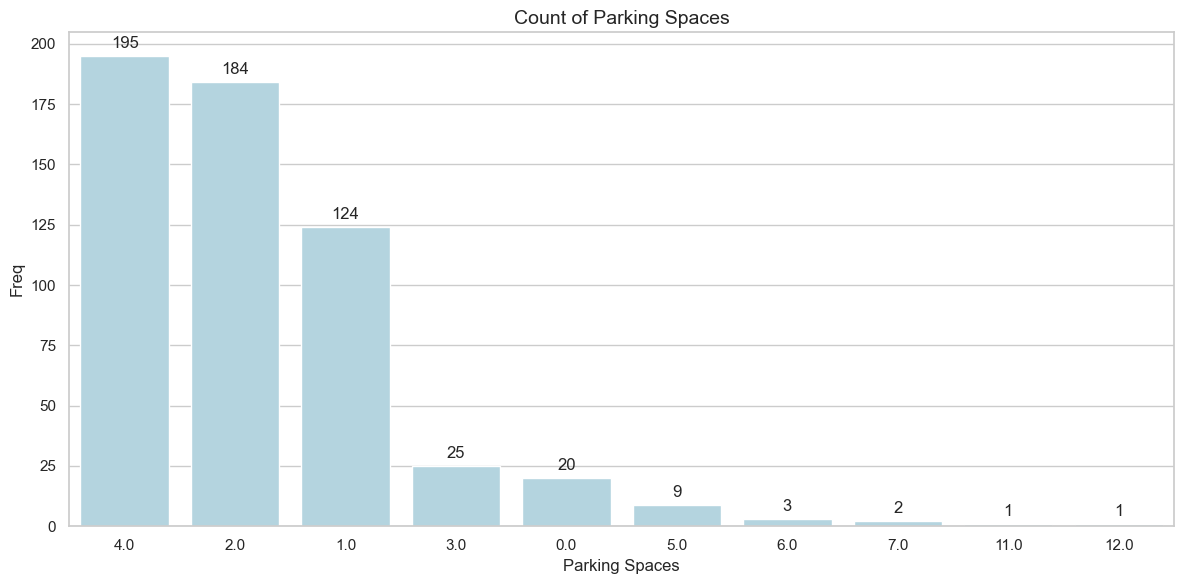

[{'Parking Spaces': 4.0, 'count': 195}, {'Parking Spaces': 2.0, 'count': 184}, {'Parking Spaces': 1.0, 'count': 124}, {'Parking Spaces': 3.0, 'count': 25}, {'Parking Spaces': 0.0, 'count': 20}, {'Parking Spaces': 5.0, 'count': 9}, {'Parking Spaces': 6.0, 'count': 3}, {'Parking Spaces': 7.0, 'count': 2}, {'Parking Spaces': 11.0, 'count': 1}, {'Parking Spaces': 12.0, 'count': 1}]


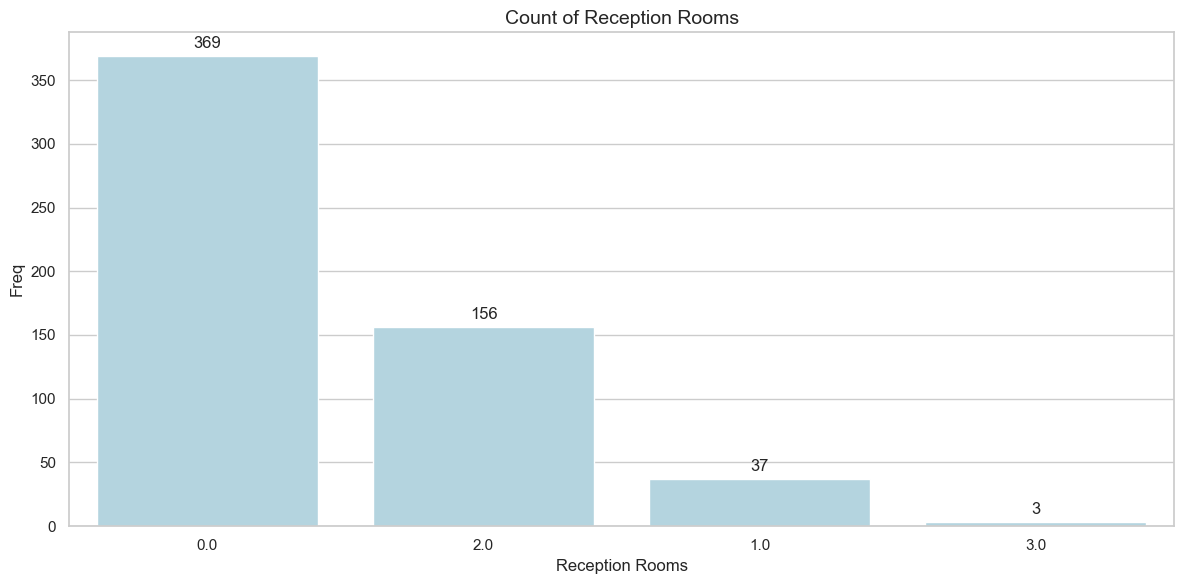

[{'Reception Rooms': 0.0, 'count': 369}, {'Reception Rooms': 2.0, 'count': 156}, {'Reception Rooms': 1.0, 'count': 37}, {'Reception Rooms': 3.0, 'count': 3}]


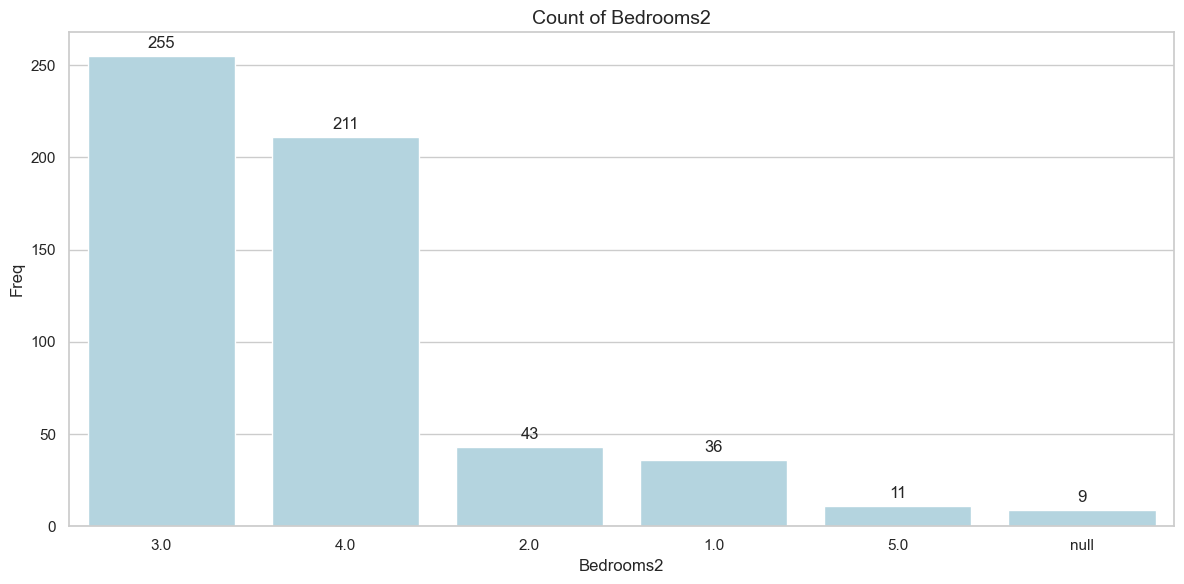

[{'Bedrooms2': 3.0, 'count': 255}, {'Bedrooms2': 4.0, 'count': 211}, {'Bedrooms2': 2.0, 'count': 43}, {'Bedrooms2': 1.0, 'count': 36}, {'Bedrooms2': 5.0, 'count': 11}, {'Bedrooms2': 'null', 'count': 9}]


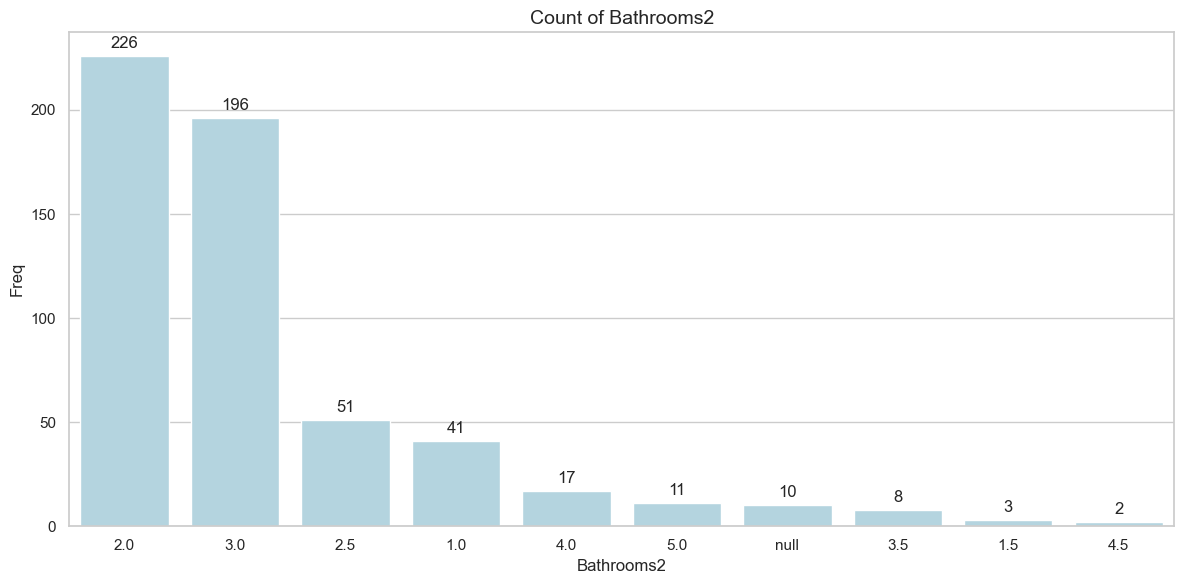

[{'Bathrooms2': 2.0, 'count': 226}, {'Bathrooms2': 3.0, 'count': 196}, {'Bathrooms2': 2.5, 'count': 51}, {'Bathrooms2': 1.0, 'count': 41}, {'Bathrooms2': 4.0, 'count': 17}, {'Bathrooms2': 5.0, 'count': 11}, {'Bathrooms2': 'null', 'count': 10}, {'Bathrooms2': 3.5, 'count': 8}, {'Bathrooms2': 1.5, 'count': 3}, {'Bathrooms2': 4.5, 'count': 2}]


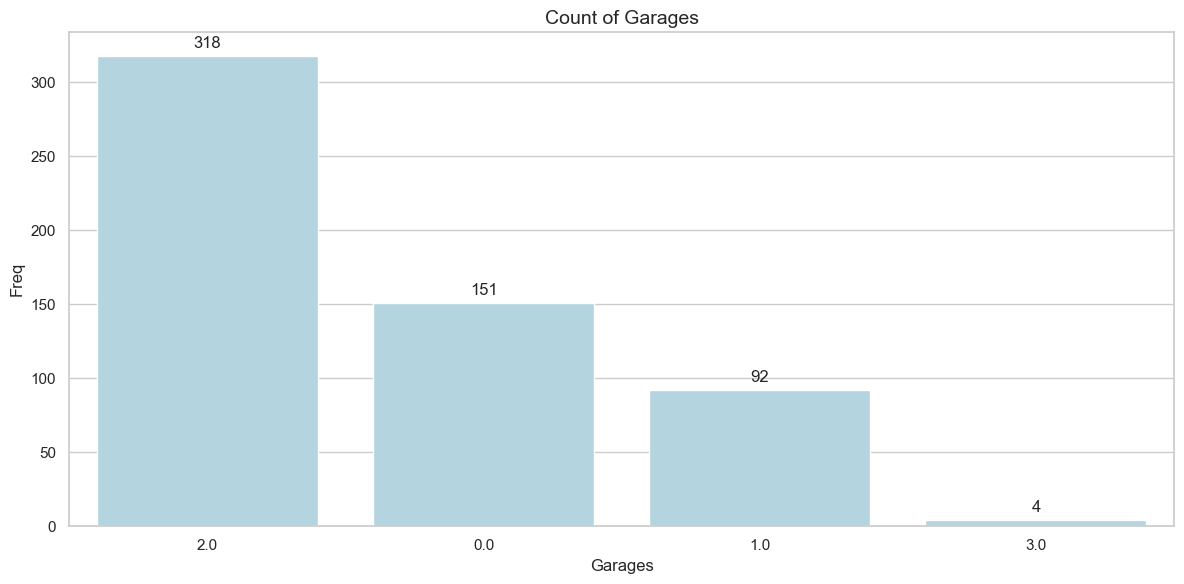

[{'Garages': 2.0, 'count': 318}, {'Garages': 0.0, 'count': 151}, {'Garages': 1.0, 'count': 92}, {'Garages': 3.0, 'count': 4}]


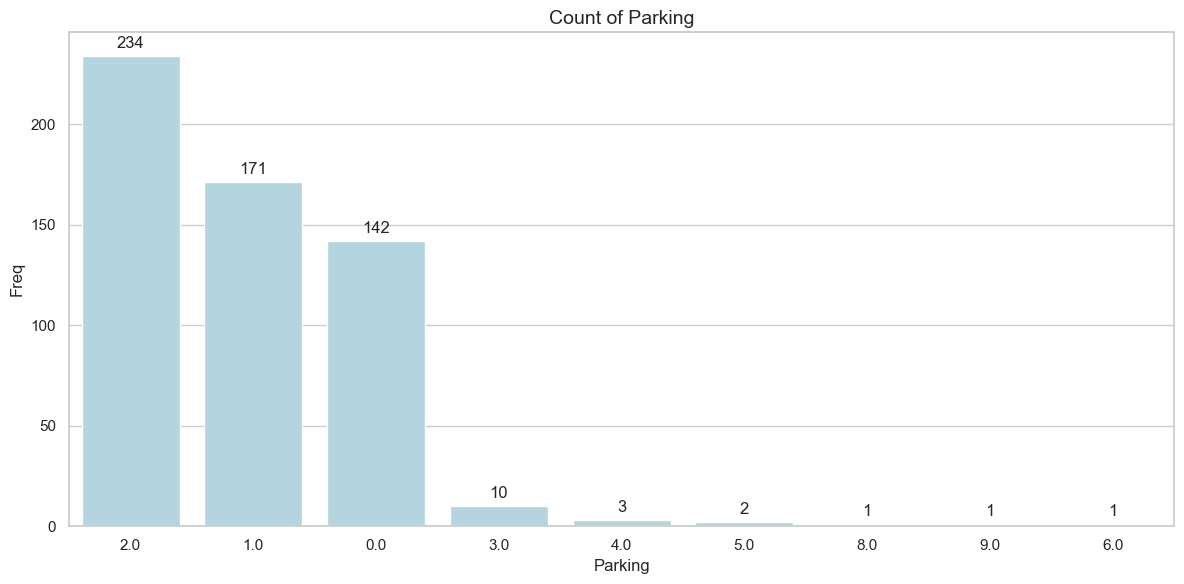

[{'Parking': 2.0, 'count': 234}, {'Parking': 1.0, 'count': 171}, {'Parking': 0.0, 'count': 142}, {'Parking': 3.0, 'count': 10}, {'Parking': 4.0, 'count': 3}, {'Parking': 5.0, 'count': 2}, {'Parking': 8.0, 'count': 1}, {'Parking': 9.0, 'count': 1}, {'Parking': 6.0, 'count': 1}]


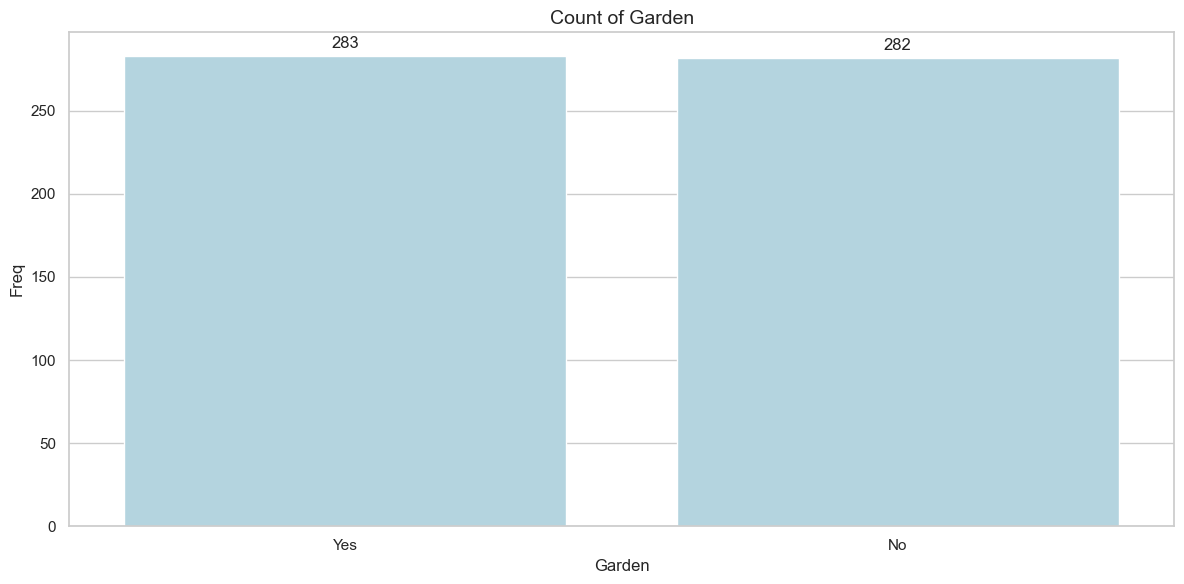

[{'Garden': 'Yes', 'count': 283}, {'Garden': 'No', 'count': 282}]


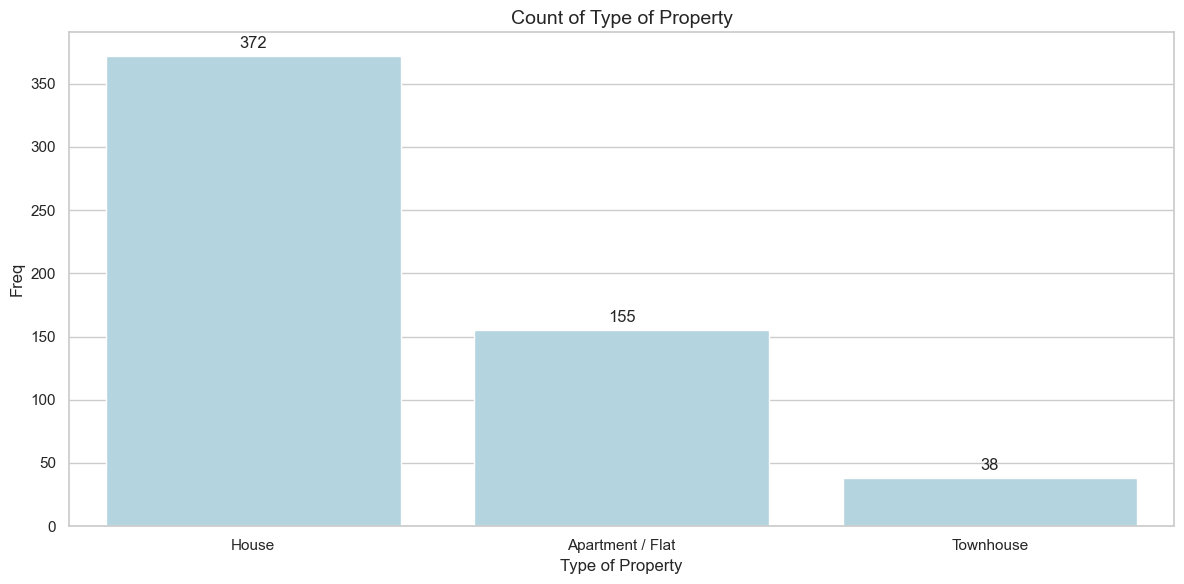

[{'Type of Property': 'House', 'count': 372}, {'Type of Property': 'Apartment / Flat', 'count': 155}, {'Type of Property': 'Townhouse', 'count': 38}]


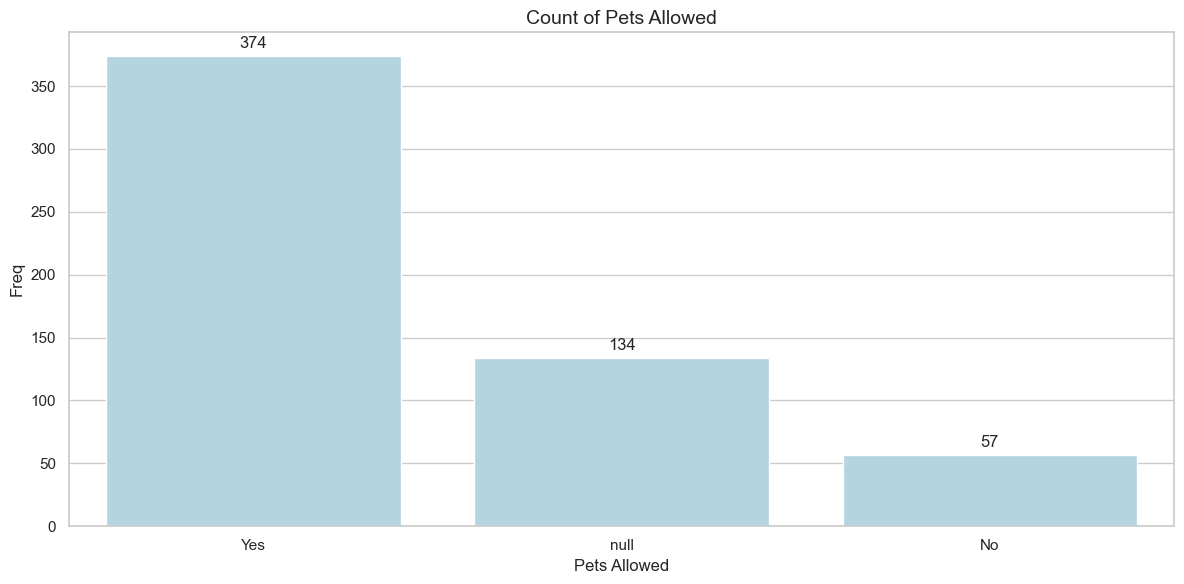

[{'Pets Allowed': 'Yes', 'count': 374}, {'Pets Allowed': 'null', 'count': 134}, {'Pets Allowed': 'No', 'count': 57}]


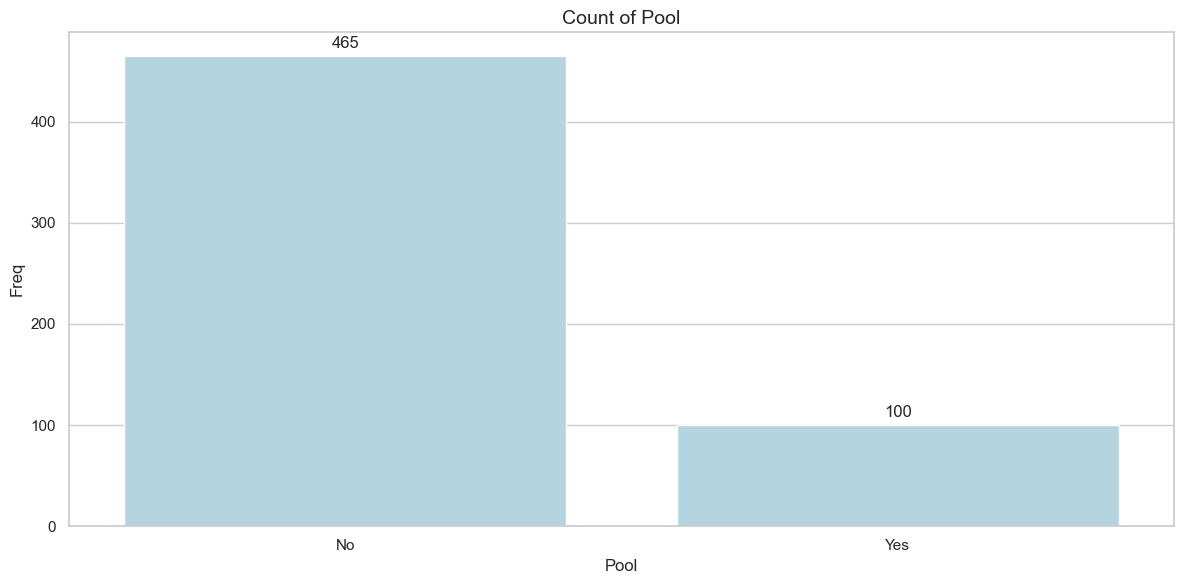

[{'Pool': 'No', 'count': 465}, {'Pool': 'Yes', 'count': 100}]


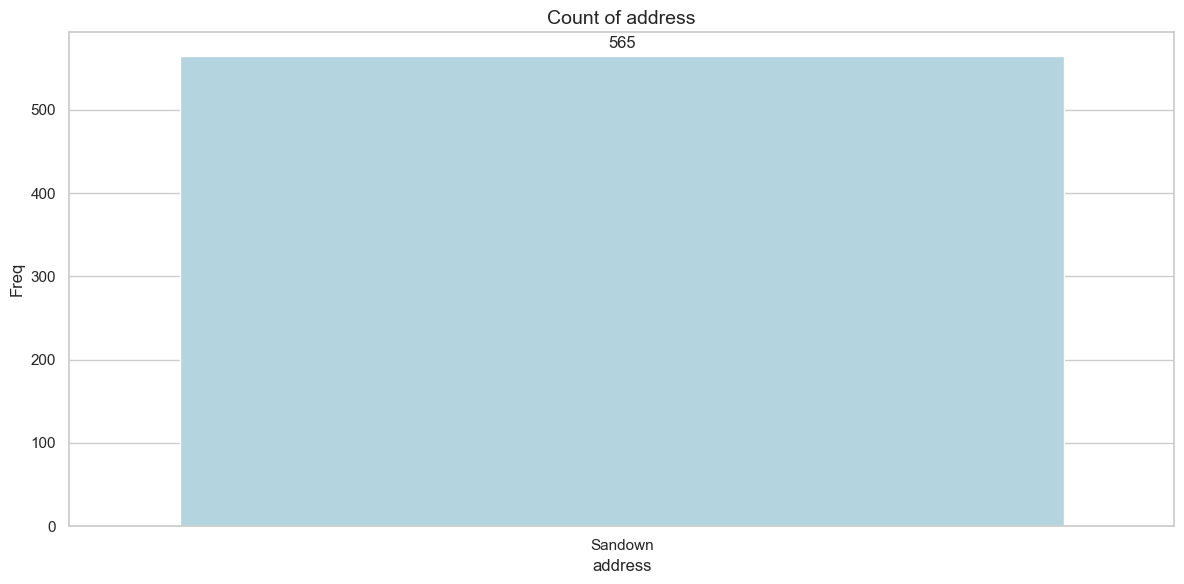

[{'address': 'Sandown', 'count': 565}]


In [710]:
cols = ['Parking Spaces', "Reception Rooms", 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking','Garden', 'Type of Property', 'Pets Allowed', 'Pool', 'address']
for col in cols:
    data = plot_categores(col)
    print(data)

In [711]:
df.columns

Index(['Parking Spaces', 'Floor Size', 'Garden', 'Type of Property',
       'Pets Allowed', 'Reception Rooms', 'Erf Size', 'Pool', 'price2',
       'address', 'days_since_listing', 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking'],
      dtype='object')

In [712]:
numeric_cols = ['Parking Spaces', 'Floor Size', 'Reception Rooms', 'Erf Size', 'price2',
       'Bedrooms2', 'Bathrooms2', 'Garages', 'Parking']

<Axes: >

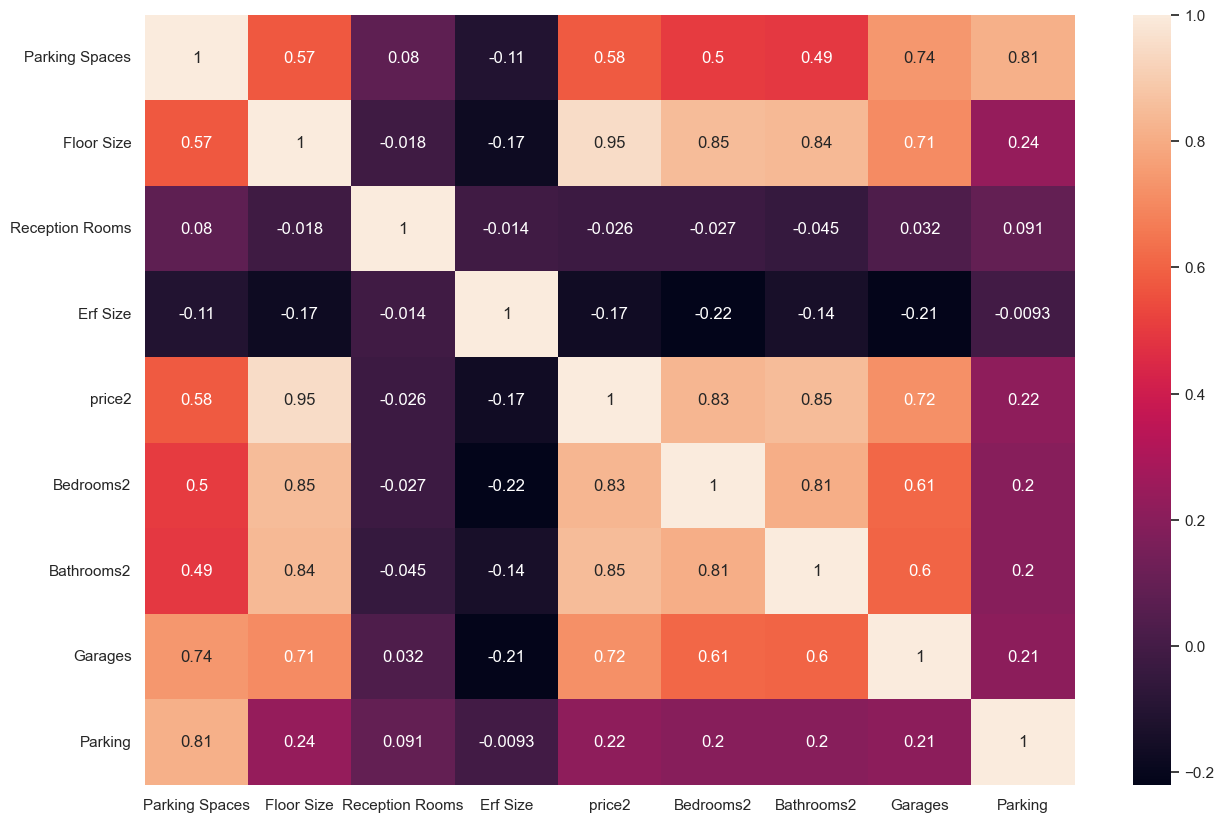

In [713]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [714]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ 
    
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    
    """
    sns.set_context(font_scale=1.5) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green', orient="h") # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.histplot(feature, kde=False, ax=ax_hist2, color="lightblue") # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

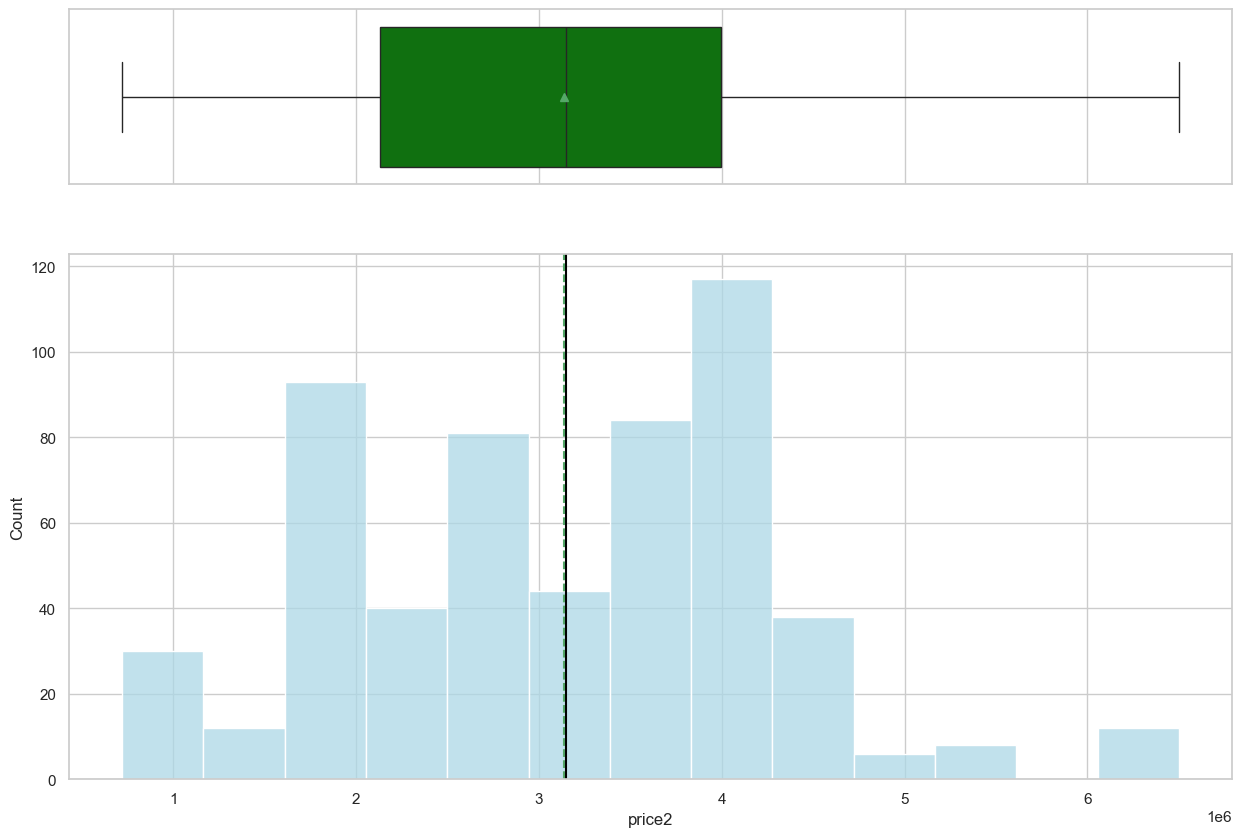

In [715]:
histogram_boxplot(df.price2)

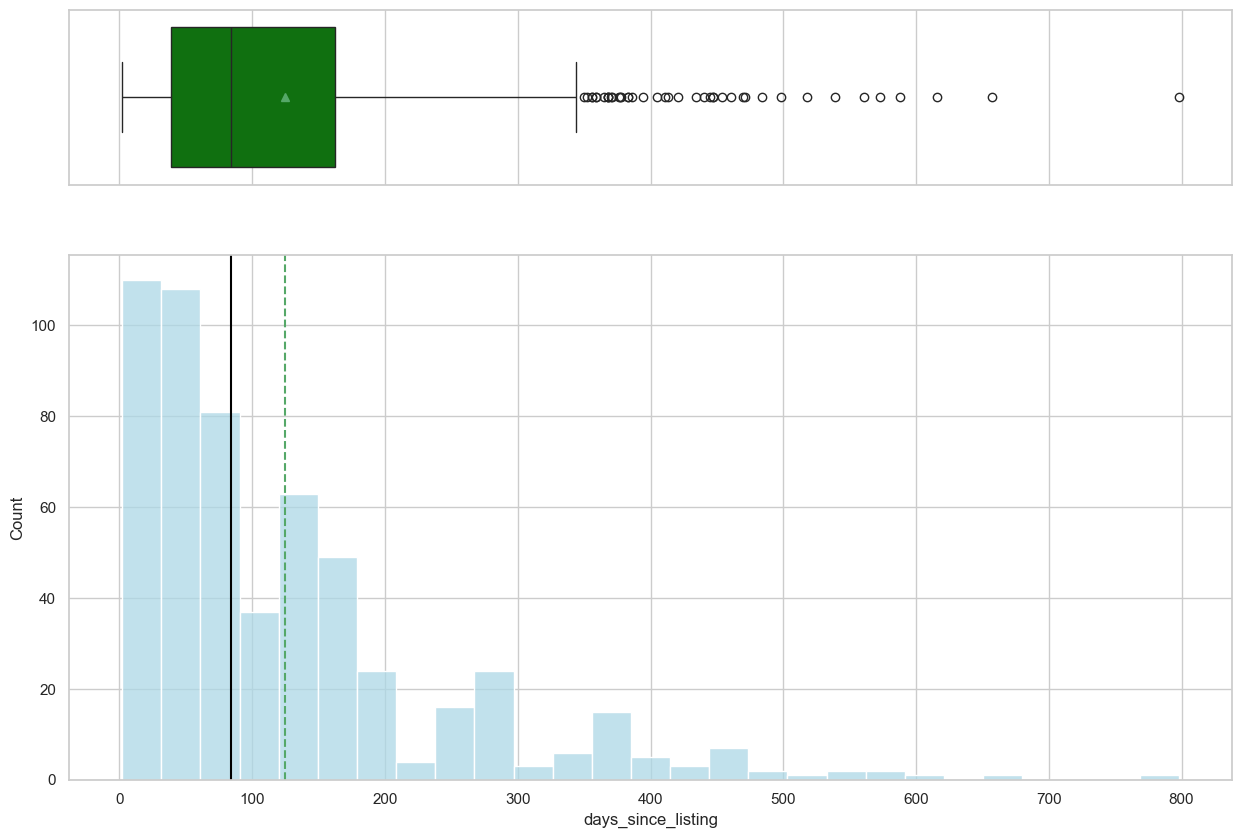

In [717]:
# sns.scatterplot(data=df, x="Erf")

histogram_boxplot(df.days_since_listing)

In [718]:
df.columns

Index(['Parking Spaces', 'Floor Size', 'Garden', 'Type of Property',
       'Pets Allowed', 'Reception Rooms', 'Erf Size', 'Pool', 'price2',
       'address', 'days_since_listing', 'Bedrooms2', 'Bathrooms2', 'Garages',
       'Parking'],
      dtype='object')

In [721]:

# df = df[df["Type of Property"]=="House"]
# df["bedbath"] = df["Bedrooms2"]+df["Bathrooms2"]
# df["flooref"] = df["Floor Size"] * df["Erf Size"]

df = df.drop(["address", "days_since_listing", "Parking Spaces", 'Garages', "Erf Size"], axis=1)

In [722]:
df.head()

,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Pool,price2,Bedrooms2,Bathrooms2,Parking
75,41.00,No,Apartment / Flat,Yes,0.00,Yes,1150000,1.00,1.00,1.00
346,272.00,Yes,House,Yes,0.00,Yes,4850000,4.00,3.00,2.00
628,109.00,No,Apartment / Flat,Yes,0.00,Yes,2080000,3.00,2.00,2.00
733,113.00,No,Apartment / Flat,Yes,0.00,No,1879500,3.00,2.00,1.00
836,307.00,Yes,House,Yes,0.00,Yes,5350000,4.00,4.00,0.00


In [723]:
df = df.dropna().reset_index(drop=True)
df.price2 = df.price2/1000

In [724]:
df.shape

(391, 10)

In [725]:
df.head()

,Floor Size,Garden,Type of Property,Pets Allowed,Reception Rooms,Pool,price2,Bedrooms2,Bathrooms2,Parking
0,41.00,No,Apartment / Flat,Yes,0.00,Yes,1150.00,1.00,1.00,1.00
1,272.00,Yes,House,Yes,0.00,Yes,4850.00,4.00,3.00,2.00
2,109.00,No,Apartment / Flat,Yes,0.00,Yes,2080.00,3.00,2.00,2.00
3,113.00,No,Apartment / Flat,Yes,0.00,No,1879.50,3.00,2.00,1.00
4,307.00,Yes,House,Yes,0.00,Yes,5350.00,4.00,4.00,0.00


In [726]:
df.columns

Index(['Floor Size', 'Garden', 'Type of Property', 'Pets Allowed',
       'Reception Rooms', 'Pool', 'price2', 'Bedrooms2', 'Bathrooms2',
       'Parking'],
      dtype='object')

In [727]:
df2 = pd.get_dummies(df, columns=["Type of Property", "Pool", "Garden", "Pets Allowed",], drop_first=True)

In [728]:
# df2
# df2=df
df2.head()

,Floor Size,Reception Rooms,price2,Bedrooms2,Bathrooms2,Parking,Type of Property_House,Type of Property_Townhouse,Pool_Yes,Garden_Yes,Pets Allowed_Yes
0,41.00,0.00,1150.00,1.00,1.00,1.00,False,False,True,False,True
1,272.00,0.00,4850.00,4.00,3.00,2.00,True,False,True,True,True
2,109.00,0.00,2080.00,3.00,2.00,2.00,False,False,True,False,True
3,113.00,0.00,1879.50,3.00,2.00,1.00,False,False,False,False,True
4,307.00,0.00,5350.00,4.00,4.00,0.00,True,False,True,True,True


In [729]:
# lets build our linear model
# independant variables
X = df2.drop(['price2'], axis=1)
# the dependent variable
y = df2[['price2']]

# Modelling

In [730]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [731]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train, y_test = np.array(y_train).ravel(), y_test

In [732]:
all_results = []

## 1. Linear regression model

In [733]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3190.8113479853478


In [734]:
# for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [735]:
# y_true = y_test["price2"]
# pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()})

In [736]:
y_pred_test = regression_model.predict(X_test)
y_pred_train = regression_model.predict(X_train)

results = {
    "model": "LinearRegression",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [737]:
results

{'model': 'LinearRegression',
 'r2_test': 0.9322297348168076,
 'r2_train': 0.9160872027170253,
 'mae_test': np.float64(206.85705346331483),
 'mae_train': np.float64(221.78468007017477),
 'mse_test': np.float64(82194.84167664412),
 'mse_train': np.float64(105127.43091738636)}

## 2. Ridge Regression

In [738]:
# Initialize Ridge model
ridge = Ridge(alpha=10)  # alpha is the regularization strength

# Fit the model
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')

Ridge Regression MSE: 81753.06340113831


In [739]:
y_pred_test = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)

results = {
    "model": "Ridge Regression",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [740]:
results

{'model': 'Ridge Regression',
 'r2_test': 0.9299220419481867,
 'r2_train': 0.9122504398266492,
 'mae_test': np.float64(210.39127132152902),
 'mae_train': np.float64(227.77210217803244),
 'mse_test': np.float64(81753.06340113831),
 'mse_train': np.float64(106623.91693159028)}

In [741]:
# y_pred = ridge.predict(X_test)
# y_true = y_test["price2"]
# pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()})

## 3. Laso Regression

In [742]:
# Initialize Lasso model
lasso = Lasso(alpha=10)  # alpha is the regularization strength

# Fit the model
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')

Lasso Regression MSE: 84946.97965996167


In [743]:
y_pred_test = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)

results = {
    "model": "Lasso Regression",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [744]:
# y_pred = ridge.predict(X_test)
# y_true = y_test["price2"]
# pd.DataFrame({"y_true": y_true.to_list(), "y_pred": y_pred.ravel()}).to_dict(orient="records")

## 4. Polynomial Regression

In [745]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Polynomial features transformation (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Fit the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)


LinearRegression()

In [746]:
y_pred_test = poly_model.predict(X_test_poly)
y_pred_train = poly_model.predict(X_train_poly)

results = {
    "model": "Polynomial Regression",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [747]:
results

{'model': 'Polynomial Regression',
 'r2_test': 0.9048791861796166,
 'r2_train': 0.9504911790464324,
 'mae_test': np.float64(233.07420455673994),
 'mae_train': np.float64(186.23838919056203),
 'mse_test': np.float64(119734.98941127594),
 'mse_train': np.float64(65182.660335111585)}

In [748]:
# y_pred_poly = poly.predict(X_test_poly)
# y_true_poly = y_test_poly["price2"]
# pd.DataFrame({"y_true": y_true_poly.to_list(), "y_pred": y_pred_poly.ravel()}).to_dict(orient="records")

## 5. Decision Trees

In [749]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# # Sample data
# X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
# y = np.array([1.5, 3.7, 2.8, 5.5, 7.8])

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_test = tree_reg.predict(X_test)
y_pred_train = tree_reg.predict(X_train)

results = {
    "model": "Decision Tree Regressor",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [750]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    "max_depth": [None, 2, 3, 4, 5],          # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],         # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],  # Function to measure the quality of a split
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict using the best estimator
best_model = grid_search.best_estimator_


y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


results = {
    "model": "Decision Tree Regressor (Tuned)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

Best parameters found:  {'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}


## 6. Random Fores

In [751]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Fit the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, np.array(y_train).ravel())

# Predict and evaluate
y_pred = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression MSE: {mse:.2f}")
print(f"Random Forest Regression R²: {r2:.2f}")


y_pred_test = forest_reg.predict(X_test)
y_pred_train = forest_reg.predict(X_train)


results = {
    "model": "Random Forest Regressor",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

Random Forest Regression MSE: 70027.50
Random Forest Regression R²: 0.95


In [752]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],          # Number of trees in the forest
    "max_depth": [None, 3, 5, 7],            # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],         # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],           # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
grid_search.fit(X_train, np.array(y_train).ravel())

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Predict using the best estimator
best_model = grid_search.best_estimator_

y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

results = {
    "model": "Random Forest Regressor (Tuned)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## 7. Adaptive Boosting (Adaboost)

In [753]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the base regressor and AdaBoost Regressor
base_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
ada_reg = AdaBoostRegressor(estimator=base_reg, n_estimators=100, random_state=42)

# Fit the model
ada_reg.fit(X_train, np.array(y_train).ravel())


y_pred_test = ada_reg.predict(X_test)
y_pred_train = ada_reg.predict(X_train)

results = {
    "model": "AdaBoost (with DTs)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)


Known issue on Mac: You are running 32-bit Python on a 64-bit OS

Solution

brew install libomp

## 8. XGBooosting

In [754]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
xgb_reg.fit(X_train, np.array(y_train).ravel())

y_pred_test = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

results = {
    "model": "XGBoost Regressor",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

In [755]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)

# Define the parameter grid
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "learning_rate": [0.01, 0.1, 0.2],
#     "max_depth": [3, 5, 7],
#     "min_child_weight": [1, 3, 5],
#     "subsample": [0.6, 0.8, 1.0],
#     "colsample_bytree": [0.6, 0.8, 1.0],
#     "gamma": [0, 0.1, 0.2],
#     "reg_alpha": [0, 0.01, 0.1],
#     "reg_lambda": [1, 1.5, 2],
# }

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
# grid_search.fit(X_train, np.array(y_train).ravel())

# Best parameters from grid search
best_params = {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.6}
print("Best parameters found: ", best_params)

# Predict using the best estimator
best_model = grid_search.best_estimator_


y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

results = {
    "model": "XGBoost Regressor (Tuned)",
    "r2_test": r2_score(y_pred_test, y_test),
    "r2_train": r2_score(y_pred_train, y_train),
    "mae_test": mean_absolute_error(y_pred_test, y_test),
    "mae_train": mean_absolute_error(y_pred_train, y_train),
    "mse_test": mean_squared_error(y_pred_test, y_test),
    "mse_train": mean_squared_error(y_pred_train, y_train)
}
all_results.append(results)

Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 2, 'subsample': 0.6}


In [756]:
pd.DataFrame(all_results)

,model,r2_test,r2_train,mae_test,mae_train,mse_test,mse_train
0,LinearRegression,0.93,0.92,206.86,221.78,82194.84,105127.43
1,Ridge Regression,0.93,0.91,210.39,227.77,81753.06,106623.92
2,Lasso Regression,0.93,0.91,211.40,224.56,84946.98,106115.15
3,Polynomial Regression,0.90,0.95,233.07,186.24,119734.99,65182.66
4,Decision Tree Regressor,0.94,1.00,158.52,11.58,87122.12,2353.93
5,Decision Tree Regressor (Tuned),0.92,0.92,207.59,163.22,97147.14,102598.53
6,Random Forest Regressor,0.94,0.99,160.90,68.55,70027.50,17613.83
7,Random Forest Regressor (Tuned),0.94,0.99,160.90,68.55,70027.50,17613.83
8,AdaBoost (with DTs),0.94,0.96,199.20,196.67,71520.17,58043.30
9,XGBoost Regressor,0.95,0.98,170.86,104.77,66187.41,24695.57
